# Ejercicio Exploratory Data Analysis – Project 1

### Exploratory Data Analysis (EDA): Uso de librería pandas y otras librerías

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 19')

### Leer archivo de venta de videojuegos vgsales.csv.

### Lectura del archivo

#### I took the database from:
- https://www.kaggle.com/datasets/pranavkrishna/vgsales

In [8]:
df = pd.read_csv('vgsales.csv')

###  head, tail, sample, describe

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12504,12506,Top Gear Hyper-Bike,N64,1999.0,Racing,Kemco,0.05,0.01,0.00,0.00,0.06
5054,5056,NCAA Final Four 2000,PS,1999.0,Sports,989 Sports,0.21,0.14,0.00,0.02,0.38
6176,6178,Mission: Impossible - Operation Surma,PS2,2003.0,Platform,Atari,0.14,0.11,0.00,0.04,0.28
1854,1856,Petz Dogz 2,DS,2007.0,Simulation,Ubisoft,0.47,0.52,0.00,0.12,1.10
3844,3846,Mega Man 6,NES,1993.0,Platform,Capcom,0.28,0.07,0.16,0.01,0.52


In [9]:
pd.options.display.float_format='{:.2f}'.format

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


###  Validación de columnas numéricas para que el describe funcione con todas.

In [9]:
df.info()

# En la siguiente tabla se puede observar que hay cuatro columnas
# que no son numericas (Name, Platform, Genre, Publisher). Como los
# valores de estas variables son tipo capdena (por la informacion
# que expresan) no se pueden cambiar a tipo numerico. Por lo cual,
# se dejan asi. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Totales

In [16]:
df.shape

(16598, 11)

###  1) Total de videojuegos analizados

In [14]:
# Total de video juegos analizados
total_names = df['Name'].unique().__len__()
total_names

# El rango de filas del dataset es de 16598. Como el total de video juegos
# analizados es 11493 quiere decir que algunos juegos se vendieron en mas
# de 1 ano.

11493

###  2) total de géneros analizados


In [18]:
# Total de generos analizados
total_genre = df['Genre'].unique().__len__()
total_genre

# Existen solo 12 tipos de generos diferentes de video juegos.

12

### 3) Plataformas analizadas

In [20]:
# Total de Plataformas analizadas
total_platform = df['Platform'].unique().__len__()
total_platform

# Han existido solo 31 tipo de plataformas desde el 
# inicio de los videojuegos.

31

## Ventas

 ### 1) Total de ventas por año

#### 1.1 Global

In [42]:
df_salesxyears_global=df.groupby('Year')['Global_Sales'].sum().rename('Total_Sales').reset_index()
df_salesxyears_global.sort_values(ascending=False, by='Year')

,Year,Total_Sales
38,2020,0
37,2017,0
36,2016,71
35,2015,264
34,2014,337
33,2013,368
32,2012,364
31,2011,516
30,2010,600
29,2009,667


#### 1.2 North America

In [43]:
df_salesxyears_na=df.groupby('Year')['NA_Sales'].sum().rename('NA_Sales').reset_index()
df_salesxyears_na.sort_values(ascending=False, by='Year')

,Year,NA_Sales
38,2020,0
37,2017,0
36,2016,23
35,2015,103
34,2014,132
33,2013,155
32,2012,155
31,2011,241
30,2010,304
29,2009,339


#### 1.3 European Union

In [44]:
df_salesxyears_eu=df.groupby('Year')['EU_Sales'].sum().rename('EU_Sales').reset_index()
df_salesxyears_eu.sort_values(ascending=False, by='Year')

,Year,EU_Sales
38,2020,0
37,2017,0
36,2016,27
35,2015,98
34,2014,126
33,2013,126
32,2012,119
31,2011,167
30,2010,177
29,2009,192


#### 1.4 Japan

In [45]:
df_salesxyears_jp=df.groupby('Year')['JP_Sales'].sum().rename('JP_Sales').reset_index()
df_salesxyears_jp.sort_values(ascending=False, by='Year')

,Year,JP_Sales
38,2020,0
37,2017,0
36,2016,14
35,2015,34
34,2014,39
33,2013,48
32,2012,52
31,2011,53
30,2010,59
29,2009,62


#### 1.5 Others

In [36]:
df_salesxyears_os=df.groupby('Year')['Other_Sales'].sum().rename('Other_Sales').reset_index()
df_salesxyears_os.sort_values(ascending=False, by='Year')

,Year,Other_Sales
38,2020,0
37,2017,0
36,2016,8
35,2015,30
34,2014,40
33,2013,40
32,2012,38
31,2011,54
30,2010,60
29,2009,75


In [50]:
# Poniendo todas las tablas juntas

result = df_salesxyears_global.merge(df_salesxyears_na,on='Year').merge(df_salesxyears_eu,on='Year').merge(df_salesxyears_jp,on='Year').merge(df_salesxyears_os,on='Year')
result

,Year,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,11,11,1,0,0
1,1981,36,33,2,0,0
2,1982,29,27,2,0,0
3,1983,17,8,1,8,0
4,1984,50,33,2,14,1
5,1985,54,34,5,15,1
6,1986,37,12,3,20,2
7,1987,22,8,1,12,0
8,1988,47,24,7,16,1
9,1989,73,45,8,18,2


### 2) Juegos más vendidos por año

#### 2.1 Global

In [93]:
#Global_sales row: 8

years=list(df['Year'].sort_values().unique())
gamesxyear=[]

for year in years:
    new_df=df.loc[df['Year']==year]
    game=new_df['Name'].loc[new_df['Global_Sales']==new_df['Global_Sales'].max()].values.tolist()
    gamesxyear.append(game)

df_gamesxyear=pd.DataFrame(gamesxyear)
df_gamesxyear.rename(columns={0:'Games_Global'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_global=pd.concat([df_years,df_gamesxyear],axis=1)
df_answer_global.drop(39,inplace=True)
df_answer_global

,Years,Games_Global
0,1980,Asteroids
1,1981,Pitfall!
2,1982,Pac-Man
3,1983,Baseball
4,1984,Duck Hunt
5,1985,Super Mario Bros.
6,1986,The Legend of Zelda
7,1987,Zelda II: The Adventure of Link
8,1988,Super Mario Bros. 3
9,1989,Tetris


#### 2.2 North America

In [94]:
#NA_sales row: 8

years=list(df['Year'].sort_values().unique())
gamesxyear=[]

for year in years:
    new_df=df.loc[df['Year']==year]
    game=new_df['Name'].loc[new_df['NA_Sales']==new_df['NA_Sales'].max()].values.tolist()
    gamesxyear.append(game)

df_gamesxyear=pd.DataFrame(gamesxyear)
df_gamesxyear.drop([1,2],axis=1,inplace=True)
df_gamesxyear.rename(columns={0:'Games_NA'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_na=pd.concat([df_years,df_gamesxyear],axis=1)
df_answer_na.drop(39,inplace=True)
df_answer_na

,Years,Games_NA
0,1980,Asteroids
1,1981,Pitfall!
2,1982,Pac-Man
3,1983,Pitfall II: Lost Caverns
4,1984,Duck Hunt
5,1985,Super Mario Bros.
6,1986,The Legend of Zelda
7,1987,Zelda II: The Adventure of Link
8,1988,Super Mario Bros. 3
9,1989,Tetris


#### 2.3 European Union

In [109]:
#EU_sales row: 8

years=list(df['Year'].sort_values().unique())
gamesxyear=[]

for year in years:
    new_df=df.loc[df['Year']==year]
    game=new_df['Name'].loc[new_df['EU_Sales']==new_df['EU_Sales'].max()].values.tolist()
    gamesxyear.append(game)

df_gamesxyear=pd.DataFrame(gamesxyear)
df_gamesxyear.drop([1,2],axis=1,inplace=True)
df_gamesxyear.rename(columns={0:'Games_EU'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_eu=pd.concat([df_years,df_gamesxyear],axis=1)
df_answer_eu.drop(39,inplace=True)
df_answer_eu

,Years,Games_EU
0,1980,Asteroids
1,1981,Pitfall!
2,1982,Pac-Man
3,1983,Mario Bros.
4,1984,Duck Hunt
5,1985,Super Mario Bros.
6,1986,The Legend of Zelda
7,1987,Zelda II: The Adventure of Link
8,1988,Super Mario Bros. 3
9,1989,Super Mario Land


#### 2.4 Japan

In [96]:
#JP_sales row: 8

years=list(df['Year'].sort_values().unique())
gamesxyear=[]

for year in years:
    new_df=df.loc[df['Year']==year]
    game=new_df['Name'].loc[new_df['JP_Sales']==new_df['JP_Sales'].max()].values.tolist()
    gamesxyear.append(game)

df_gamesxyear=pd.DataFrame(gamesxyear)
df_gamesxyear.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45],axis=1,inplace=True)
df_gamesxyear.rename(columns={0:'Games_JP'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_jp=pd.concat([df_years,df_gamesxyear],axis=1)
df_answer_jp.drop(39,inplace=True)
df_answer_jp

,Years,Games_JP
0,1980,Asteroids
1,1981,Pitfall!
2,1982,Pac-Man
3,1983,Baseball
4,1984,Golf
5,1985,Super Mario Bros.
6,1986,Super Mario Bros.: The Lost Levels
7,1987,Dragon Warrior II
8,1988,Super Mario Bros. 3
9,1989,Tetris


#### 2.5 Others

In [97]:
#Other_sales row: 8

years=list(df['Year'].sort_values().unique())
gamesxyear=[]

for year in years:
    new_df=df.loc[df['Year']==year]
    game=new_df['Name'].loc[new_df['Other_Sales']==new_df['Other_Sales'].max()].values.tolist()
    gamesxyear.append(game)

df_gamesxyear=pd.DataFrame(gamesxyear)
df_gamesxyear.drop([1,2,3],axis=1,inplace=True)
df_gamesxyear.rename(columns={0:'Games_Other'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_os=pd.concat([df_years,df_gamesxyear],axis=1)
df_answer_os.drop(39,inplace=True)
df_answer_os

,Years,Games_Other
0,1980,Asteroids
1,1981,Pitfall!
2,1982,Pac-Man
3,1983,Baseball
4,1984,Duck Hunt
5,1985,Super Mario Bros.
6,1986,Dragon Warrior
7,1987,Zelda II: The Adventure of Link
8,1988,Super Mario Bros. 3
9,1989,Tetris


In [98]:
# Poniendo todas las tablas juntas

result = df_answer_global.merge(df_answer_na,on='Years').merge(df_answer_eu,on='Years').merge(df_answer_jp,on='Years').merge(df_answer_os,on='Years')
result

,Years,Games_Global,Games_NA,Games_EU,Games_JP,Games_Other
0,1980,Asteroids,Asteroids,Asteroids,Asteroids,Asteroids
1,1981,Pitfall!,Pitfall!,Pitfall!,Pitfall!,Pitfall!
2,1982,Pac-Man,Pac-Man,Pac-Man,Pac-Man,Pac-Man
3,1983,Baseball,Pitfall II: Lost Caverns,Mario Bros.,Baseball,Baseball
4,1984,Duck Hunt,Duck Hunt,Duck Hunt,Golf,Duck Hunt
5,1985,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.
6,1986,The Legend of Zelda,The Legend of Zelda,The Legend of Zelda,Super Mario Bros.: The Lost Levels,Dragon Warrior
7,1987,Zelda II: The Adventure of Link,Zelda II: The Adventure of Link,Zelda II: The Adventure of Link,Dragon Warrior II,Zelda II: The Adventure of Link
8,1988,Super Mario Bros. 3,Super Mario Bros. 3,Super Mario Bros. 3,Super Mario Bros. 3,Super Mario Bros. 3
9,1989,Tetris,Tetris,Super Mario Land,Tetris,Tetris


### 3) Plataformas con más ingresos por año

#### 3.1 Global

In [105]:
#Global_sales row: 8

years=list(df['Year'].sort_values().unique())
platformsxyear=[]

for year in years:
    df_helper=df.loc[df['Year']==year]
    df_platforms=df_helper['Platform'].loc[df_helper['Global_Sales']==df_helper['Global_Sales'].max()].values.tolist()
    platformsxyear.append(df_platforms)
    
df_platforms=pd.DataFrame(platformsxyear)
df_platforms.rename(columns={0:'Platfroms_Global'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_global=pd.concat([df_years,df_platforms],axis=1)
df_answer_global.drop(39,inplace=True)

df_answer_global

,Years,Platfroms_Global
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,NES
4,1984,NES
5,1985,NES
6,1986,NES
7,1987,NES
8,1988,NES
9,1989,GB


#### 3.2 North America

In [116]:
#NA_sales row: 8

years=list(df['Year'].sort_values().unique())
platformsxyear=[]

for year in years:
    df_helper=df.loc[df['Year']==year]
    df_platforms=df_helper['Platform'].loc[df_helper['NA_Sales']==df_helper['NA_Sales'].max()].values.tolist()
    platformsxyear.append(df_platforms)
    
df_platforms=pd.DataFrame(platformsxyear)
df_platforms.drop([1,2],axis=1,inplace=True)
df_platforms.rename(columns={0:'Platfroms_NA'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_na=pd.concat([df_years,df_platforms],axis=1)
df_answer_na.drop(39,inplace=True)

df_answer_na

,Years,Platfroms_NA
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,2600
4,1984,NES
5,1985,NES
6,1986,NES
7,1987,NES
8,1988,NES
9,1989,GB


#### 3.3 European Union

In [117]:
#EU_sales row: 8

years=list(df['Year'].sort_values().unique())
platformsxyear=[]

for year in years:
    df_helper=df.loc[df['Year']==year]
    df_platforms=df_helper['Platform'].loc[df_helper['EU_Sales']==df_helper['EU_Sales'].max()].values.tolist()
    platformsxyear.append(df_platforms)
    
df_platforms=pd.DataFrame(platformsxyear)
df_platforms.drop([1,2],axis=1,inplace=True)
df_platforms.rename(columns={0:'Platfroms_EU'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_eu=pd.concat([df_years,df_platforms],axis=1)
df_answer_eu.drop(39,inplace=True)

df_answer_eu

,Years,Platfroms_EU
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,NES
4,1984,NES
5,1985,NES
6,1986,NES
7,1987,NES
8,1988,NES
9,1989,GB


#### 3.4 Japan

In [118]:
#JP_sales row: 8

years=list(df['Year'].sort_values().unique())
platformsxyear=[]

for year in years:
    df_helper=df.loc[df['Year']==year]
    df_platforms=df_helper['Platform'].loc[df_helper['JP_Sales']==df_helper['JP_Sales'].max()].values.tolist()
    platformsxyear.append(df_platforms)
    
df_platforms=pd.DataFrame(platformsxyear)
df_platforms.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45],axis=1,inplace=True)
df_platforms.rename(columns={0:'Platfroms_JP'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_jp=pd.concat([df_years,df_platforms],axis=1)
df_answer_jp.drop(39,inplace=True)

df_answer_jp

,Years,Platfroms_JP
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,NES
4,1984,NES
5,1985,NES
6,1986,NES
7,1987,NES
8,1988,NES
9,1989,GB


#### 4.5 Other

In [119]:
#Other_sales row: 8

years=list(df['Year'].sort_values().unique())
platformsxyear=[]

for year in years:
    df_helper=df.loc[df['Year']==year]
    df_platforms=df_helper['Platform'].loc[df_helper['Other_Sales']==df_helper['Other_Sales'].max()].values.tolist()
    platformsxyear.append(df_platforms)
    
df_platforms=pd.DataFrame(platformsxyear)
df_platforms.drop([1,2,3],axis=1,inplace=True)
df_platforms.rename(columns={0:'Platfroms_Other'},inplace=True)
df_years=pd.DataFrame(years)
df_years.rename(columns={0:'Years'},inplace=True)
pd.options.display.float_format='{:.0f}'.format
df_answer_os=pd.concat([df_years,df_platforms],axis=1)
df_answer_os.drop(39,inplace=True)

df_answer_os

,Years,Platfroms_Other
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,NES
4,1984,NES
5,1985,NES
6,1986,NES
7,1987,NES
8,1988,NES
9,1989,GB


In [120]:
# Poniendo todas las tablas juntas

result = df_answer_global.merge(df_answer_na,on='Years').merge(df_answer_eu,on='Years').merge(df_answer_jp,on='Years').merge(df_answer_os,on='Years')
result

,Years,Platfroms_Global,Platfroms_NA,Platfroms_EU,Platfroms_JP,Platfroms_Other
0,1980,2600,2600,2600,2600,2600
1,1981,2600,2600,2600,2600,2600
2,1982,2600,2600,2600,2600,2600
3,1983,NES,2600,NES,NES,NES
4,1984,NES,NES,NES,NES,NES
5,1985,NES,NES,NES,NES,NES
6,1986,NES,NES,NES,NES,NES
7,1987,NES,NES,NES,NES,NES
8,1988,NES,NES,NES,NES,NES
9,1989,GB,GB,GB,GB,GB


### 4) Gráfico de comparación de ventas entre géneros por año

In [18]:
import plotly.express as px

In [125]:
fig=px.bar(df,x='Year',y='Global_Sales',color='Genre',title='Ventas entre géneros por año')
fig.show()

### Insights: 2 Gráficos adicionales interesantes

In [11]:
df1=df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).reset_index()
df2=df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).reset_index()
df3=df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).reset_index()
df4=df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).reset_index()

result = df1.merge(df2,on='Genre').merge(df3,on='Genre').merge(df4,on='Genre')
result

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,877.83,525.00,159.95,187.38
1,Sports,683.35,376.85,135.37,134.97
2,Shooter,582.60,313.27,38.28,102.69
3,Platform,447.05,201.63,130.77,51.59
4,Misc,410.24,215.98,107.76,75.32
5,Racing,359.42,238.39,56.69,77.27
6,Role-Playing,327.28,188.06,352.31,59.61
7,Fighting,223.59,101.32,87.35,36.68
8,Simulation,183.31,113.38,63.70,31.52
9,Puzzle,123.78,50.78,57.31,12.55


<AxesSubplot: xlabel='Genre', ylabel='Ventas en millones'>

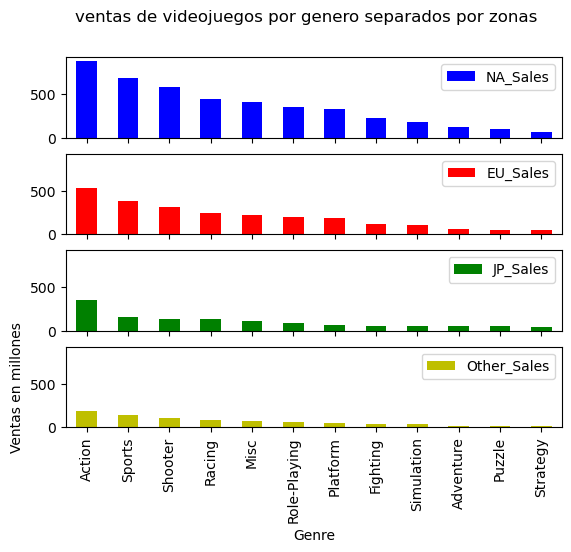

In [16]:
fig,axes=plt.subplots(nrows=4,ncols=1,sharex=True,sharey=True)
plt.suptitle('ventas de videojuegos por genero separados por zonas')
plt.ylabel('Ventas en millones')
plt.xlabel('Genero')
df1.plot.bar(x='Genre',ax=axes[0],color='b')
df2.plot.bar(x='Genre',ax=axes[1],color='r')
df3.plot.bar(x='Genre',ax=axes[2],color='g')
df4.plot.bar(x='Genre',ax=axes[3],color='y')

# En este grafico se puede apreciar cuales son los generos
# mas relevantes en este mercado de video juegos y cual es 
# la region que tiene una mayor participacion.
# Los generos de Accion, Sport y disparos son los mas 
# importantes en todas las regiones (queria verificar si
# era asi en todos los casos) siendo Norte America aquella
# region en la cual se tiene una mayor demanda por los 
# video juegos.

In [178]:
total_publisher = df['Publisher'].unique().__len__()
total_publisher

579

In [20]:
df_publisher=df[df['Year']>2000].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
df5=df_publisher.head(10)
df5

,Publisher,Global_Sales
0,Nintendo,1150.90
1,Electronic Arts,983.28
2,Activision,662.62
3,Ubisoft,460.44
4,Sony Computer Entertainment,413.86
5,Take-Two Interactive,383.42
6,THQ,304.87
7,Microsoft Game Studios,239.58
8,Sega,218.73
9,Konami Digital Entertainment,214.18


In [22]:
fig= px.pie(df5, names='Publisher',values='Global_Sales', title='Participación del mercado de las principales compañias de videojuegos después del 2000 ')
fig.show()

# En este grafico se puede apreciar la concentracion del mercado global de videojuegos
# en los ultimos 20 anos.
# 2 empresas tienen el control de un poco mas del 40% del mercado mientras que el 60%
# restante esta repartido entre 8 empresas. Por otro lado, Aunque si el mercado mas 
# importante esta en norteamerica la empresa con mayor participacion es Japones (Nintendo)
# mientras que la segunda y la tercera son americanas. La Union Europea se hace presente
# solo en la cuarta posicion con Ubisoft (empresa Francesa).   